# First CNN model for MNIST Dataset

* MNIST Dataset is ''Hello World'' of Image Recognition

* [Dataset HomePage](http://yann.lecun.com/exdb/mnist/)

* History of MNIST Dataset [Watch here](https://www.youtube.com/watch?v=oKzNUGz21JM)


---
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a 
test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![Kitten](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


# Let's start building our first CNN Model

In [1]:
from keras import layers
from keras import models

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Training the convnet on MNIST images

In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


#### compile and fit model 

In [6]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 36s 5ms/step - loss: 0.4393 - accuracy: 0.8596 - val_loss: 0.0641 - val_accuracy: 0.9801
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0540 - accuracy: 0.9830 - val_loss: 0.0411 - val_accuracy: 0.9882
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0368 - accuracy: 0.9886 - val_loss: 0.0334 - val_accuracy: 0.9896
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0266 - accuracy: 0.9919 - val_loss: 0.0412 - val_accuracy: 0.9900
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0207 - accuracy: 0.9935 - val_loss: 0.0350 - val_accuracy: 0.9911


#### evaluate model

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0276 - accuracy: 0.9913


0.9912999868392944

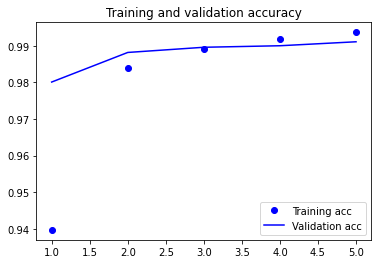

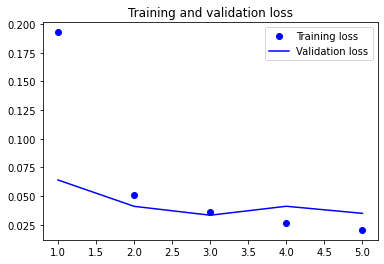

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search. 

In [9]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
# Function to create model, required for KerasClassifier
def create_model( conv_activation='sigmoid'):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation=conv_activation, input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=conv_activation))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=1)
# define parameters and values for grid search 
param_grid = {
    'conv_activation': ['sigmoid', 'tanh'],    
    'epochs': [5,10],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10)
grid_result = grid.fit(train_images, train_labels)



/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3011 - accuracy: 0.9044
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0531 - accuracy: 0.9844
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0357 - accuracy: 0.9891
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0259 - accuracy: 0.9920
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0205 - accuracy: 0.9941
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0160 - accuracy: 0.9954
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0155 - accuracy: 0.9957
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0119 - accuracy: 0.9966
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0114 - accuracy: 0.9970
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.009

NameError: ignored

In [14]:
print(grid_result)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f62890bf150>,
             iid='deprecated', n_jobs=-1,
             param_grid={'conv_activation': ['sigmoid', 'tanh'],
                         'epochs': [5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [10]:
print("Best params",grid_result.best_params_)
print("Best score",grid_result.best_score_)

Best params {'conv_activation': 'tanh', 'epochs': 10}
Best score 0.9881833314895629
